In [1]:
%matplotlib inline



# Maximum Bipartite Matching

This example demonstrates an efficient way to find and visualise a maximum biparite matching using :meth:`igraph.Graph.maximum_bipartite_matching`.


In [2]:
import igraph as ig
import matplotlib.pyplot as plt

First, we construct a bipartite graph, assigning:
 - nodes 0-4 to one side
 - nodes 5-8 to the other side



In [3]:
g = ig.Graph.Bipartite(
    [0, 0, 0, 0, 0, 1, 1, 1, 1],
    [(0, 5), (1, 6), (1, 7), (2, 5), (2, 8), (3, 6), (4, 5), (4, 6)]
)

We can easily check that the graph is indeed bipartite:



In [4]:
assert g.is_bipartite()

Now can can compute the maximum bipartite matching:



In [5]:
matching = g.maximum_bipartite_matching()

It's easy to print matching pairs of vertices



In [6]:
matching_size = 0
print("Matching is:")
for i in range(5):
    print(f"{i} - {matching.match_of(i)}")
    if matching.is_matched(i):
        matching_size += 1
print("Size of maximum matching is:", matching_size)

Matching is:
0 - 5
1 - 7
2 - 8
3 - 6
4 - None
Size of maximum matching is: 4


Finally, we can plot the bipartite graph, highlighting the edges connecting
maximal matches by a red color:



<AxesSubplot:>

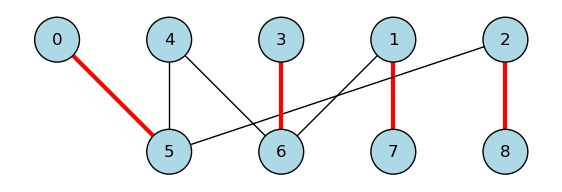

In [7]:
fig, ax = plt.subplots(figsize=(7, 3))
ig.plot(
    g,
    target=ax,
    layout=g.layout_bipartite(),
    vertex_size=0.4,
    vertex_label=range(g.vcount()),
    vertex_color="lightblue",
    edge_width=[3 if e.target == matching.match_of(e.source) else 1.0 for e in g.es],
    edge_color=["red" if e.target == matching.match_of(e.source) else "black" for e in g.es]
)